In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist
import seaborn as sns

In [4]:

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to have a single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


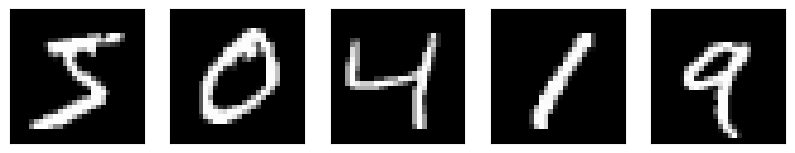

In [5]:
# Let's plot some of the images
plt.figure(figsize=(10, 2))
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [6]:
# Define the encoder model
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [7]:
# Define the decoder model
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded, name="Convolutional_AutoEncoder")
autoencoder.summary()

Model: "Convolutional_AutoEncoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - loss: 0.3013 - val_loss: 0.0905
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0886 - val_loss: 0.0816
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.0814 - val_loss: 0.0777
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0778 - val_loss: 0.0753
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.0756 - val_loss: 0.0738
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0743 - val_loss: 0.0730
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0732 - val_loss: 0.0719
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0725 - val_loss: 0.0714
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0719 - val_loss: 0.0708
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0713 - val_loss: 0.0704
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0709 - val_loss: 0.0703
Epoch 12/50
235/235 ━━━━━━━━━━

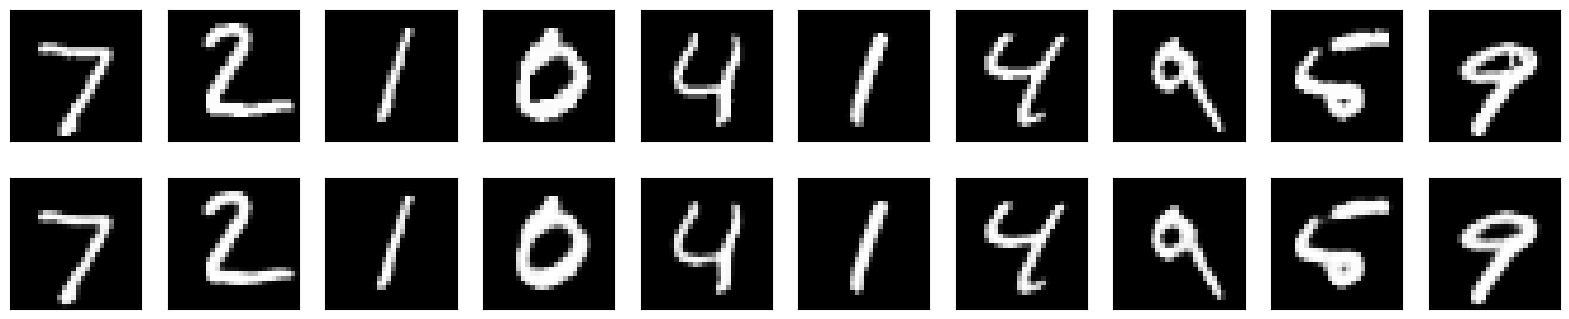

In [8]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history =autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Let's plot some of the images
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


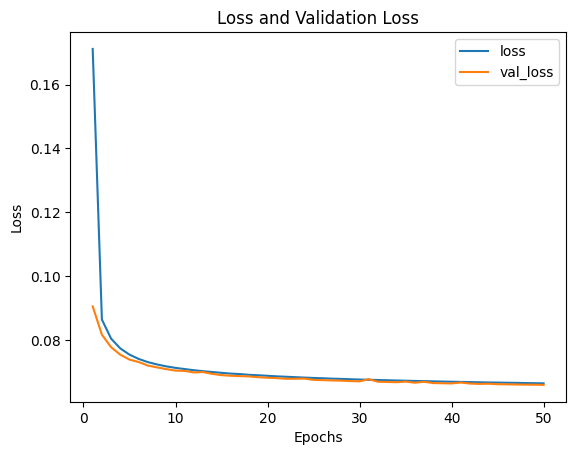

In [9]:
epochs = list(range(1, 51))
sns.lineplot(x=epochs, y=history.history['loss'], label='loss')
sns.lineplot(x=epochs, y=history.history['val_loss'], label='val_loss')
plt.title('Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()